In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D 
import spiceypy as spice

import math


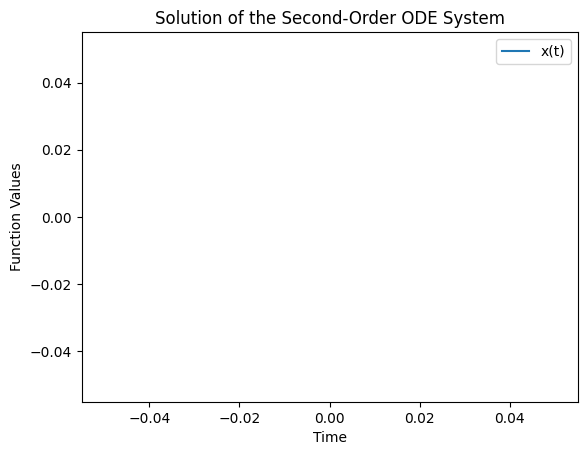

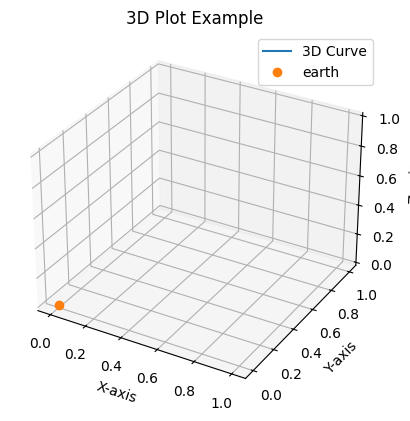

[140961664.18440723]
[0.]
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 8.640e+04  8.640e+04]
        y: [[-2.267e+03 -2.274e+03]
            [-6.682e+00 -6.680e+00]
            [ 4.077e+03  4.075e+03]
            [-2.333e+00 -2.336e+00]
            [ 6.394e+03  6.394e+03]
            [-5.814e-01 -5.866e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0


In [68]:
# This function solves the non-linear problem, we need to use SPICE to completely define all the variables to this problem.
# This will require to also change the function a bit to make the args[] change with time


# Define the second-order ODE system
def odefunc(t, r):
    mu = 398600
    dxdt = r[1]
    dydt = r[3]
    dzdt = r[5]
    distance_arr = np.array([r[0],r[2],r[4]])

    dx2dt2 =  -r[0]*mu/((np.linalg.norm(distance_arr))**3)
    dy2dt2 =  -r[2]*mu/((np.linalg.norm(distance_arr))**3)
    dz2dt2 =  -r[4]*mu/((np.linalg.norm(distance_arr))**3)
    return [dxdt, dx2dt2, dydt, dy2dt2, dzdt, dz2dt2]


# ------------ find positions of the moon relative to earth for wanted times ------------ #
spice.furnsh("./cassMetaK.txt")

rtol = 1e-6  # relative tolerance
atol = 1e-8  # absolute tolerance

step = 1 # time between each step
# we are going to get positions between these two dates
utc = ['Jun 20, 2004', 'Jun 21, 2004'] 

# get et values one and two, we could vectorize str2et
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

# get times
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]
time = np.array(times)-times[0] # to have the times fit between the solver and the times here above

# ------------ find positions of the moon relative to earth for wanted times ------------ #

# initiate arrays   
x = np.array([])
y = np.array([])
z = np.array([])
dx = np.array([])
dy = np.array([])
dz = np.array([])
t = np.array([])

for i in range(len(time)-1):
    
    # Set the time span for integration
    t_span = (time[i],time[i+1])

    if i == 0:
       initial_state = np.array([-2200, -6.7, 4100, -2.3, 6400, -0.53])  # x(0) = 1, dx/dt(0) = 0, y(0) = 2, dy/dt(0) = 0 ... [km/s]
    else:
        initial_state = (x[i-1],dx[i-1],y[i-1],dy[i-1],z[i-1],dz[i-1]) # the previous solution
    
    sol = solve_ivp(odefunc, t_span, initial_state, t_eval=np.linspace(t_span[0], t_span[1], 2),rtol=rtol, atol=atol)
    
    x = np.append(x,sol.y[0])    
    y = np.append(y,sol.y[2])    
    z = np.append(z,sol.y[4])  
    dx = np.append(dx,sol.y[1])    
    dy = np.append(dy,sol.y[3])    
    dz = np.append(dz,sol.y[5])  
    t = np.append(t,sol.t)  





# Plot the solutions for x and y
plt.plot(t, x, label='x(t)')
#plt.plot(t,y, label='y(t)')
#plt.plot(t,z, label='z(t)')
plt.title('Solution of the Second-Order ODE System')
plt.xlabel('Time')
plt.ylabel('Function Values')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, label='3D Curve')
ax.plot(0,0,0,'o',label="earth")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot Example')
ax.legend()
plt.show()


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x,y,z, label='3D Curve')
# ax.plot(earth_positions[:,0], earth_positions[:,1], earth_positions[:,2], 'o', label='earth Points')
# ax.plot(xpoints, ypoints, zpoints, 'o', label='Points mean')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# ax.set_title('3D Plot Example')
# ax.legend()
# plt.show()

print(times)
print(sol)


In [18]:
a = 2/3**2
print(a)
b = 2/(3**2)
print(b)
a = [1,2]
a[0]
len(a)

e = np.array([1,2])
e-5

0.2222222222222222
0.2222222222222222


array([-4, -3])

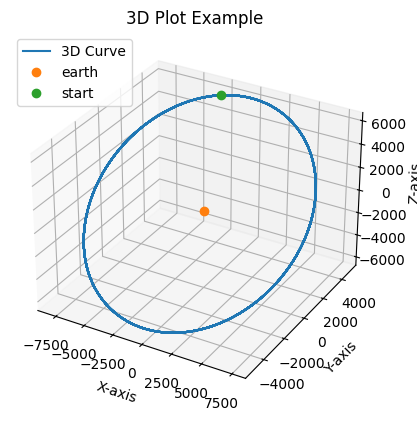

ValueError: x and y must have same first dimension, but have shapes (3362700,) and (3362800,)

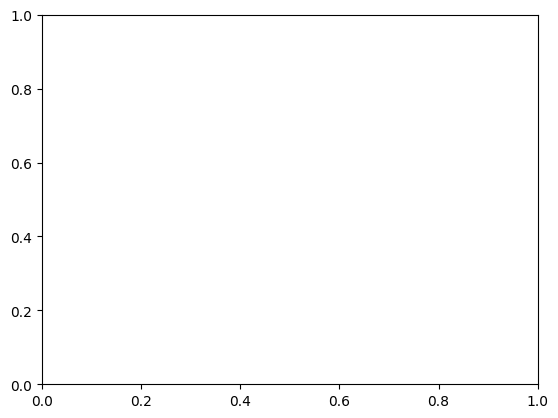

In [65]:
# # This simple example works
# def odefunc(t, r):
#     mu = 398600
#     dxdt = r[1]
#     dydt = r[3]
#     dzdt = r[5]
#     distance_arr = np.array([r[0],r[2],r[4]])

#     dx2dt2 =  -r[0]*mu/((np.linalg.norm(distance_arr))**3)
#     dy2dt2 =  -r[2]*mu/((np.linalg.norm(distance_arr))**3)
#     dz2dt2 =  -r[4]*mu/((np.linalg.norm(distance_arr))**3)
#     return [dxdt, dx2dt2, dydt, dy2dt2, dzdt, dz2dt2]


# initial_state = np.array([-2200, -6.7, 4100, -2.3, 6400, -0.53])  # x(0) = 1, dx/dt(0) = 0, y(0) = 2, dy/dt(0) = 0 ... [km/s]

# t_span = (0,24*3600*1)
# rtol = 1e-6  # Example relative tolerance
# atol = 1e-8  # Example absolute tolerance

# sol = solve_ivp(odefunc, t_span, initial_state, t_eval=np.linspace(t_span[0], t_span[1], 100000), rtol=rtol, atol=atol)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(sol.y[0],sol.y[2],sol.y[4], label='3D Curve')
# #ax.plot(xpoints, ypoints, zpoints, 'o', label='Earth')
# ax.plot(0,0,0,'o',label='earth')
# ax.plot(-2200,4100,6400,'o',label='start')
# #ax.plot(earth_positions[:,0], earth_positions[:,1], earth_positions[:,2], 'o', label='earth Points')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# ax.set_title('3D Plot Example')
# ax.legend()
# plt.show()

# # Plot the solutions for x and y
# #plt.plot(t, x, label='x(t)')
# plt.plot(t,y, label='y(t)')
# #plt.plot(t,z, label='z(t)')
# plt.title('Solution of the Second-Order ODE System')
# plt.xlabel('Time')
# plt.ylabel('Function Values')
# plt.legend()
# plt.show()

# print(sol)


In [75]:
print(np.linalg.norm([1,1,1]))
spice.furnsh("./cassMetaK.txt")

rtol = 1e-6  # relative tolerance
atol = 1e-8  # absolute tolerance

step = 3600*12
# we are going to get positions between these two dates
utc = ['Jun 20, 2004', 'Jun 21, 2004'] 

# get et values one and two, we could vectorize str2et
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

# get times
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]
time = np.array(times)-times[0] # to have the times fit between the solver and the times here above

print(times)
print(np.array(times).shape)
print(time)

1.7320508075688772
[140961664.18440723, 140961666.18440723, 140961668.18440723, 140961670.18440723, 140961672.18440723, 140961674.18440723, 140961676.18440723, 140961678.18440723, 140961680.18440723, 140961682.18440723, 140961684.18440723, 140961686.18440723, 140961688.18440723, 140961690.18440723, 140961692.18440723, 140961694.18440723, 140961696.18440723, 140961698.18440723, 140961700.18440723, 140961702.18440723, 140961704.18440723, 140961706.18440723, 140961708.18440723, 140961710.18440723, 140961712.1844072, 140961714.1844072, 140961716.1844072, 140961718.1844072, 140961720.1844072, 140961722.1844072, 140961724.1844072, 140961726.1844072, 140961728.1844072, 140961730.1844072, 140961732.1844072, 140961734.1844072, 140961736.1844072, 140961738.1844072, 140961740.1844072, 140961742.1844072, 140961744.1844072, 140961746.1844072, 140961748.1844072, 140961750.1844072, 140961752.1844072, 140961754.1844072, 140961756.1844072, 140961758.1844072, 140961760.1844072, 140961762.1844072, 140961